<a href="https://colab.research.google.com/github/agingNot/Analyzing-Indian-Startup-A-closer-at-Fundng-by-Sector/blob/main/LP5_Sentiment_Analysis_Fine_tuning_Hugging_Face_text_Classification_Model_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis with HuggingFace**

#### Hugging Face is an open-source and platform provider of machine learning technologies. You can use install their package to access some interesting pre-built models to use them directly or to fine-tune (retrain it on your dataset leveraging the prior knowledge coming with the first training), then host your trained models on the platform, so that you may use them later on other devices and apps.

#### In this task, the goal is to train a model to predict the label of a tweet based on its text. Huggingface provides pre-trained models such as BERT, RoBERTa, and DistilBERT, which have achieved state-of-the-art results on various natural language processing tasks, including text classification.

## Application of Hugging Face Text classification model Fune-tuning

# **2. Import Relevant Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Clone the github repo where the data is found

In [ ]:
!git clone https://github.com/Azubi-Africa/Career_Accelerator_P5-NLP.git

Cloning into 'Career_Accelerator_P5-NLP'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 207 (delta 110), reused 197 (delta 106), pack-reused 0
Receiving objects: 100% (207/207), 857.11 KiB | 922.00 KiB/s, done.
Resolving deltas: 100% (110/110), done.


### Download the dataset from the GitHub repo and preprocess the data by cleaning the text, removing stop words, converting text to lowercase, and tokenizing the text.

In [ ]:
df = pd.read_csv('/content/Career_Accelerator_P5-NLP/zindi_challenge/data/Train.csv')


# **2. Data Understanding & Quick EDA**

### Preview the first 5 rows of the dataframe

In [ ]:
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


### Check for data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


### Check the summary statistics of the dataframe

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,10000.0,0.301567,0.646718,-1.000000,0.000000,0.0,1.0,1.0
agreement,9999.0,0.854252,0.180707,0.333333,0.666667,1.0,1.0,1.0


### Data Shape

In [ ]:
df.shape

(10001, 4)

## Check the unique values of each column

In [ ]:
df.nunique()

tweet_id     10001
safe_text     9658
label            4
agreement        3
dtype: int64

#### checking for missing values

In [ ]:
df.isnull().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

### % of Missing Values

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

tweet_id     0.000000
safe_text    0.000000
label        0.009999
agreement    0.019998
dtype: float64

#### As the percentage of missing values in each column is far too low, I believe it wont have impact in our analysis

#### Check for Duplicates in the Data

In [ ]:
df.duplicated().sum()

0

# Dropping NAN values in the data

In [ ]:
df = df.dropna()

In [ ]:
df = df[~df.isna().any(axis=1)]

#### Duplicate tweets?

In [ ]:
df.drop_duplicates(subset='safe_text',inplace=True)

#### Looking for Correlation

In [ ]:
# calculate the correlation matrix
corr_matrix = df.corr()

<ipython-input-16-eadc27bc590b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
# print the correlation matrix
print(corr_matrix)

              label  agreement
label      1.000000   0.141417
agreement  0.141417   1.000000


#### Visualize the correrlation Matrix

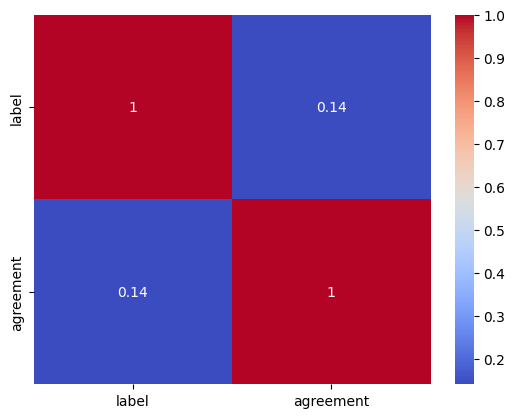

In [ ]:
# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

####Check the distribution of the 'label' column

In [ ]:
# Check the distribution of the 'label' column
print(df['label'].value_counts())

 0.0    4690
 1.0    3939
-1.0    1027
Name: label, dtype: int64


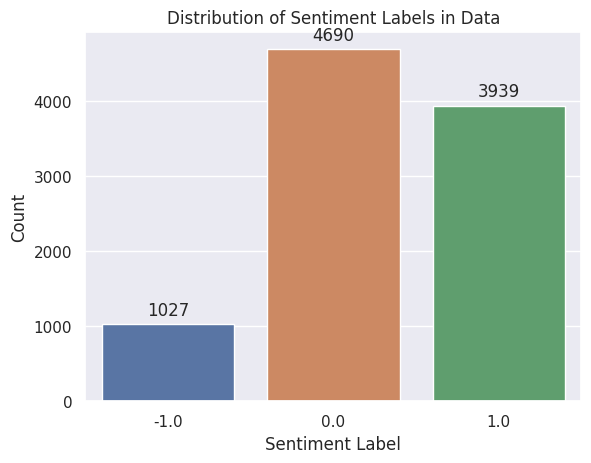

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of labels in the data
sns.set(style="darkgrid")
ax = sns.countplot(x="label", data=df)
ax.set(xlabel='Sentiment Label', ylabel='Count', title='Distribution of Sentiment Labels in Data')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

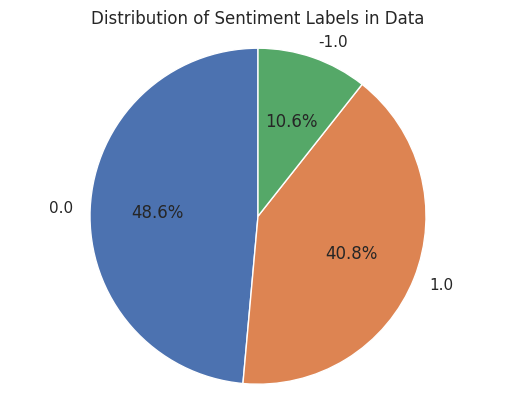

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of each label
label_counts = df['label'].value_counts(normalize=True) * 100

# Create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Labels in Data')
plt.axis('equal')
plt.show()

<Axes: xlabel='agreement', ylabel='count'>

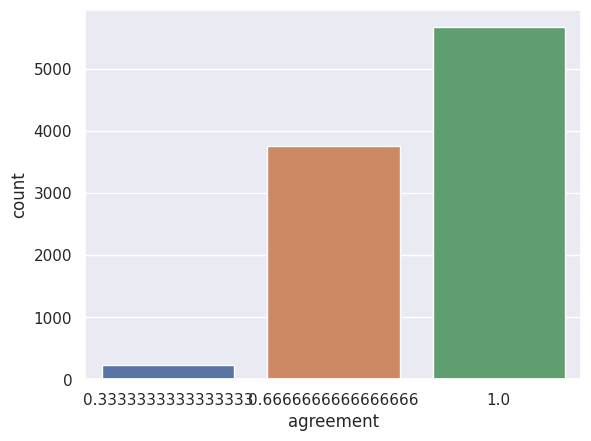

In [ ]:
# Check the distribution of agreements
sns.countplot(x='agreement', data=df)

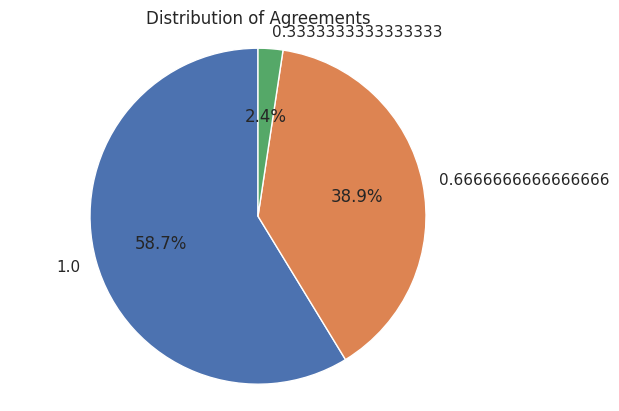

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of each agreement category
agreement_counts = df['agreement'].value_counts(normalize=True) * 100

# Create a pie chart
plt.pie(agreement_counts, labels=agreement_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Agreements')
plt.axis('equal')
plt.show()

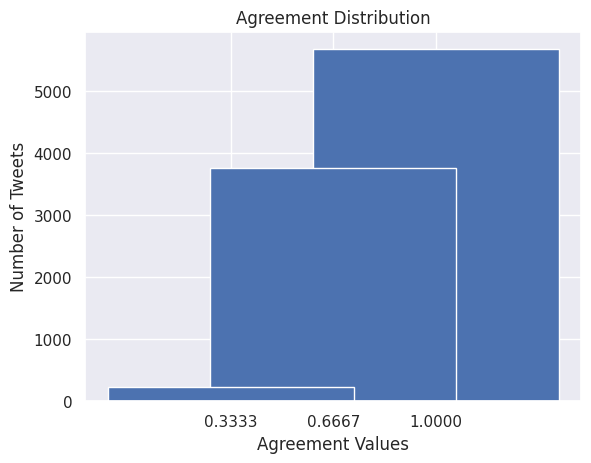

In [ ]:
# Count the number of occurrences of each agreement value
agreement_counts = df['agreement'].value_counts()

# Create a bar chart of the agreement distribution
plt.bar(agreement_counts.index, agreement_counts.values)
plt.title('Agreement Distribution')
plt.xlabel('Agreement Values')
plt.ylabel('Number of Tweets')
plt.xticks(agreement_counts.index)
plt.show()

### Distribution of the tweet lengths

histogram of the tweet lengths, which can help us understand the distribution of the tweet lengths and any potential patterns or trends

<Axes: title={'center': 'Distribution of tweet lengths'}, ylabel='Frequency'>

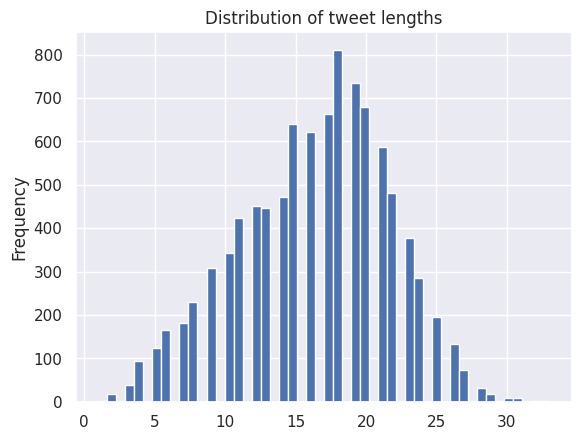

In [ ]:
# Compute the length of each tweet
df['tweet_length'] = df['safe_text'].apply(lambda x: len(x.split()))

# Plot a histogram of tweet lengths
df['tweet_length'].plot(kind='hist', bins=50, title='Distribution of tweet lengths')


#### We can use a word cloud to visualize the most common words in the data. A word cloud is a graphical representation of word frequency that uses the size of the words to indicate their frequency.

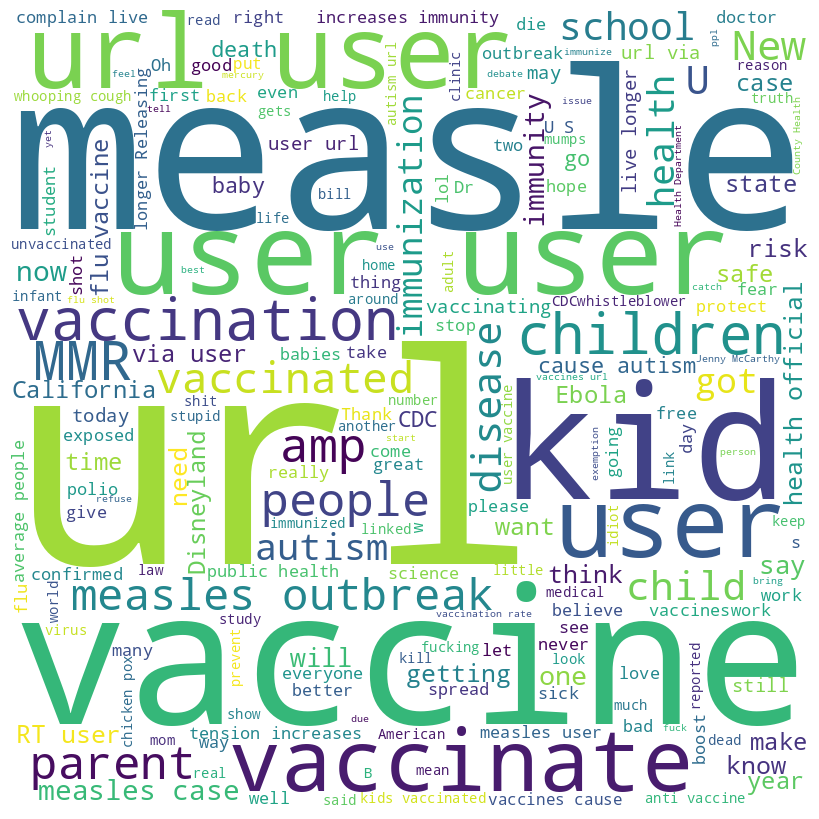

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the texts into a single string
all_text = ' '.join(df['safe_text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# **3. Tweet Deep Cleaning**

The next step is to clean the raw text data from the tweets, and we will focus our analysis on only two columns: 'safe_tweet' (raw tweets) and the target column 'label'. This will simplify the analysis and make it easier to work with these specific columns.

In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Remove URLs

In [ ]:
df['safe_text'] = df['safe_text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [ ]:
df['safe_text'].head(10)

0    Me &amp; The Big Homie meanboy3000 #MEANBOY #M...
1    I'm 100% thinking of devoting my career to pro...
2    #whatcausesautism VACCINES, DO NOT VACCINATE Y...
3    I mean if they immunize my kid with something ...
4    Thanks to <user> Catch me performing at La Nui...
5    <user> a nearly 67 year old study when mental ...
6    Study of more than 95,000 kids finds no link b...
7                     psa: VACCINATE YOUR FUCKING KIDS
8    Coughing extra on the shuttle and everyone thi...
9    AIDS vaccine created at Oregon Health &amp; Sc...
Name: safe_text, dtype: object

#### # Remove HTML tags

In [ ]:
df['safe_text'] = df['safe_text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

<ipython-input-30-276ce8f88615>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['safe_text'] = df['safe_text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


### Remove non-alphanumeric characters and convert to lowercase

The purpose of this code is to clean the text data in the 'safe_text' column of a DataFrame 'df' by removing any non-alphanumeric characters (such as punctuation marks and special symbols) and converting all letters to lowercase using the re (regular expressions) library. This is often done to prepare text data for further analysis or natural language processing applications.

In [ ]:
df['safe_text'] = df['safe_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.lower()))

### Remove stop words

Stop words are usually removed because they do not carry much meaning or importance in the context of text analysis, and can interfere with accurate results.

In [ ]:
import nltk
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['safe_text'] = df['safe_text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

### Remove Emjoi's from Our Dataset

The below code snippet removes all emojis from our data, 'safe_text' column

In [ ]:
# Print the first safe_text value, which may contain emojis
print(df.loc[0, 'safe_text'])

['big', 'homie', 'meanboy3000', 'meanboy', 'mb', 'mbs', 'mmr', 'stegmanlife', 'stegman', 'st']


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=6d56dc46c182d9ab7d32ff6ec0632f8742204e04e8536c9acce70e0732bd7db9
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
pip install --upgrade emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Removing emojis

In [ ]:
#Clean emojis from text
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Splitting the data(Data split in to train & eval)

In [ ]:
#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [ ]:
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
# Load the dataset and display some values
df = pd.read_csv('/content/Career_Accelerator_P5-NLP/zindi_challenge/data/Train.csv')

# A way to eliminate rows containing NaN values
df = df[~df.isna().any(axis=1)]

In [ ]:
# Split data into training and evaluation sets
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])



### Looking in to Train Datset

In [ ]:
train.head()

,tweet_id,safe_text,label,agreement
9305,YMRMEDME,Mickey's Measles has gone international <url>,0.0,1.000000
3907,5GV8NEZS,S1256 [NEW] Extends exemption from charitable ...,0.0,1.000000
795,EI10PS46,<user> your ignorance on vaccines isn't just ...,1.0,0.666667
5793,OM26E6DG,Pakistan partly suspends polio vaccination pro...,0.0,1.000000
3431,NBBY86FX,In other news I've gone up like 1000 mmr,0.0,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7999 entries, 9305 to 1387
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   7999 non-null   object 
 1   safe_text  7999 non-null   object 
 2   label      7999 non-null   float64
 3   agreement  7999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.5+ KB


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,7999.0,0.301413,0.646832,-1.000000,0.000000,0.0,1.0,1.0
agreement,7999.0,0.854398,0.180677,0.333333,0.666667,1.0,1.0,1.0


In [ ]:
train.shape

(7999, 4)

In [ ]:
train.nunique()

tweet_id     7999
safe_text    7764
label           3
agreement       3
dtype: int64

In [ ]:
train.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [ ]:
train.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [ ]:
percent_missing = train.isnull().sum() * 100 / len(df)
percent_missing

tweet_id     0.0
safe_text    0.0
label        0.0
agreement    0.0
dtype: float64

In [ ]:
train.duplicated().sum()

0

In [ ]:
# calculate the correlation matrix
corr_matrix = train.corr()
print(train.corr())

              label  agreement
label      1.000000   0.144122
agreement  0.144122   1.000000


<ipython-input-54-1fc94b9da331>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()
<ipython-input-54-1fc94b9da331>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.corr())


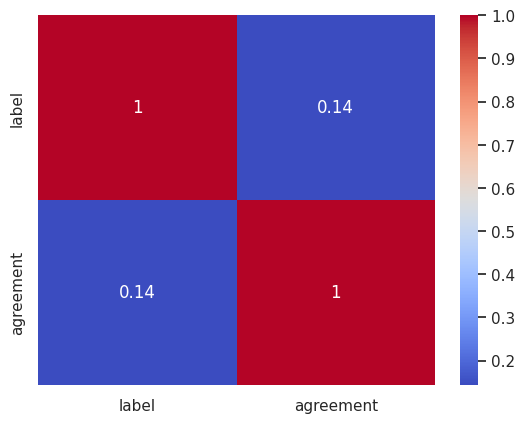

In [ ]:
# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

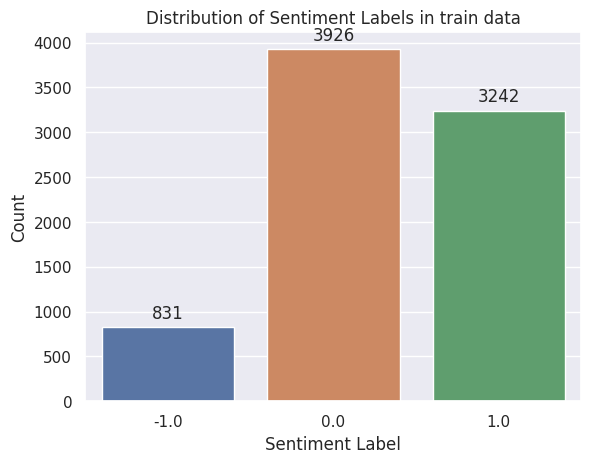

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of labels in the data
sns.set(style="darkgrid")
ax = sns.countplot(x="label", data=train)
ax.set(xlabel='Sentiment Label', ylabel='Count', title='Distribution of Sentiment Labels in train data')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

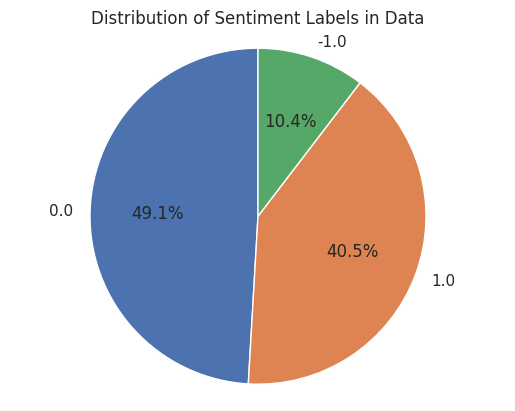

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of each label
label_counts = train['label'].value_counts(normalize=True) * 100

# Create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Labels in Data')
plt.axis('equal')
plt.show()

<Axes: title={'center': 'Distribution of tweet lengths'}, ylabel='Frequency'>

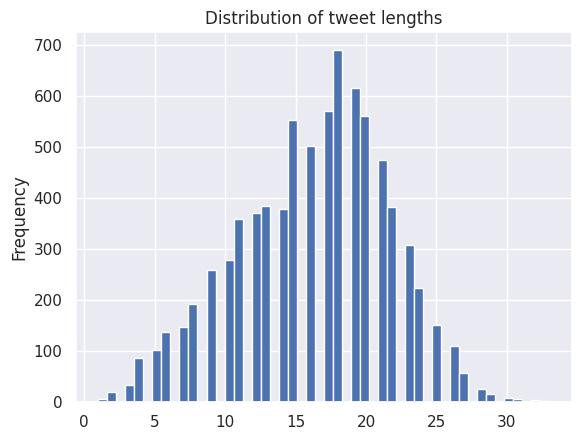

In [ ]:
# Compute the length of each tweet
train['tweet_length'] = train['safe_text'].apply(lambda x: len(x.split()))

# Plot a histogram of tweet lengths
train['tweet_length'].plot(kind='hist', bins=50, title='Distribution of tweet lengths')

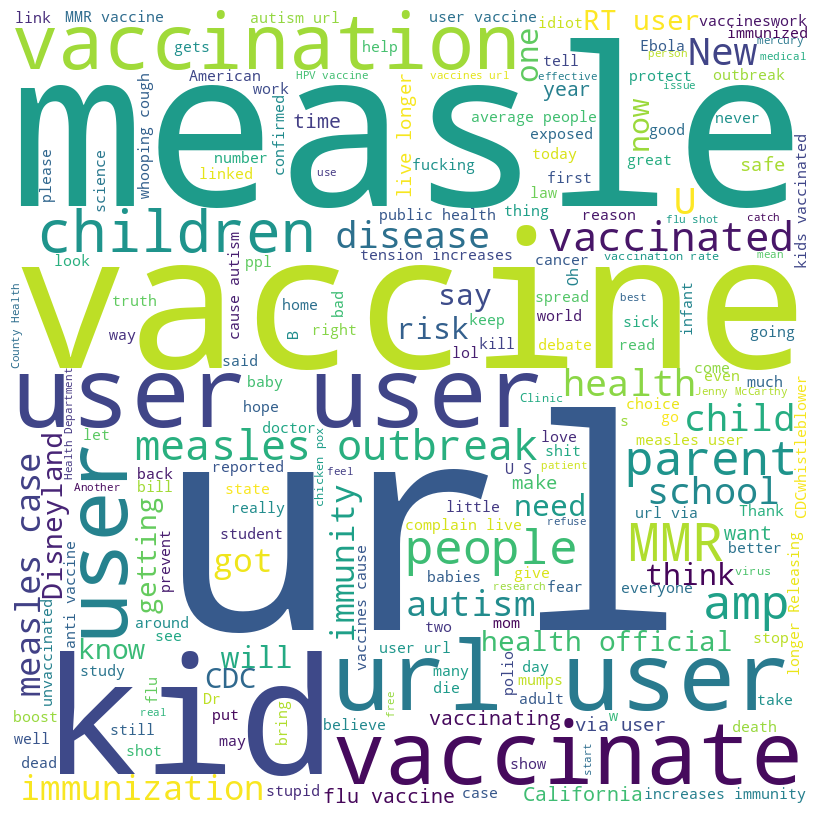

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the texts into a single string
all_text = ' '.join(train['safe_text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## **Deep Cleaning of Tweets**

The next step is to clean the raw text data from the tweets, and we will focus our analysis on only two columns: 'safe_tweet' (raw tweets) and the target column 'label'. This will simplify the analysis and make it easier to work with these specific columns.

In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Remove URLs

In [ ]:
train['safe_text'] = train['safe_text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [ ]:
df['safe_text'].head()

0    Me &amp; The Big Homie meanboy3000 #MEANBOY #M...
1    I'm 100% thinking of devoting my career to pro...
2    #whatcausesautism VACCINES, DO NOT VACCINATE Y...
3    I mean if they immunize my kid with something ...
4    Thanks to <user> Catch me performing at La Nui...
Name: safe_text, dtype: object

### Remove HTML tags

In [ ]:
train['safe_text'] = train['safe_text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

<ipython-input-67-b5faea050cd5>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  train['safe_text'] = train['safe_text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [ ]:
train['safe_text'].head()

9305             Mickey's Measles has gone international 
3907    S1256 [NEW] Extends exemption from charitable ...
795       your ignorance on vaccines isn't just danger...
5793    Pakistan partly suspends polio vaccination pro...
3431             In other news I've gone up like 1000 mmr
Name: safe_text, dtype: object

### Remove non-alphanumeric characters and convert to lowercase

The purpose of this code is to clean the text data in the 'safe_text' column of a DataFrame 'df' by removing any non-alphanumeric characters (such as punctuation marks and special symbols) and converting all letters to lowercase using the re (regular expressions) library. This is often done to prepare text data for further analysis or natural language processing applications.

In [ ]:
train['safe_text'] = train['safe_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.lower()))

In [ ]:
train['safe_text'].head()

9305              mickeys measles has gone international 
3907    s1256 new extends exemption from charitable im...
795       your ignorance on vaccines isnt just dangero...
5793    pakistan partly suspends polio vaccination pro...
3431              in other news ive gone up like 1000 mmr
Name: safe_text, dtype: object

### Remove stop words

Stop words are usually removed because they do not carry much meaning or importance in the context of text analysis, and can interfere with accurate results.

In [ ]:
import nltk
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train['safe_text'] = train['safe_text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [ ]:
train['safe_text'].head()

9305              [mickeys, measles, gone, international]
3907    [s1256, new, extends, exemption, charitable, i...
795     [ignorance, vaccines, isnt, dangerous, innocen...
5793    [pakistan, partly, suspends, polio, vaccinatio...
3431                   [news, ive, gone, like, 1000, mmr]
Name: safe_text, dtype: object

In [ ]:
#Clean emojis from text
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

In [ ]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


### Looking in to Eval Dataset

In [ ]:
eval.head()

,tweet_id,safe_text,label,agreement
6571,R7JPIFN7,Children's Museum of Houston to Offer Free Vac...,1.0,1.000000
1754,2DD250VN,<user> no. I was properly immunized prior to t...,1.0,1.000000
3325,ESEVBTFN,<user> thx for posting vaccinations are impera...,1.0,1.000000
1485,S17ZU0LC,This Baby Is Exactly Why Everyone Needs To Vac...,1.0,0.666667
4175,IIN5D33V,"Meeting tonight, 8:30pm in room 322 of the stu...",1.0,1.000000


#### Checking for the shape of the two datasets(i.e train & eval datasets)

In [ ]:
print("Shape of train data:", train.shape)


Shape of train data: (7999, 5)


#### The training dataset comprises 7999 rows and 4 columns

In [ ]:
print("Shape of evaluation data:", eval.shape)

Shape of evaluation data: (2000, 4)


#### The eval dataset on the otherhand consists 2000 rows and 4 columns

In [ ]:
# Save splitted subsets
train.to_csv("/content/Career_Accelerator_P5-NLP/zindi_challenge/data/Train.csv", index=False)
eval.to_csv("/content/Career_Accelerator_P5-NLP/zindi_challenge/data/Test.csv", index=False)

In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.1 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split

In [ ]:
dataset = load_dataset('csv',
                        data_files={'train': '/content/Career_Accelerator_P5-NLP/zindi_challenge/data/Train.csv',
                        'eval': '/content/Career_Accelerator_P5-NLP/zindi_challenge/data/Test.csv'}, encoding = "ISO-8859-1")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: ignored

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length')

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/6399 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/6399 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 6399
    })
    eval: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1600
    })
})

In [ ]:
# dataset['train']

In [ ]:
from transformers import TrainingArguments

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    eval_steps=500,
    save_strategy="steps",
    save_steps=500,
    num_train_epochs=3,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=1000,
)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
from transformers import TrainingArguments
from transformers import Trainer

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir='./logs',
    logging_steps=500,
    logging_first_step=True,
    overwrite_output_dir=True,
    learning_rate=1e-4,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
from transformers import AutoModelForSequenceClassification

# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
train_dataset = dataset['train'].shuffle(seed=10) #.select(range(40000)) # to select a part
eval_dataset = dataset['eval'].shuffle(seed=10)

## other way to split the train set ... in the range you must use: 
# # int(num_rows*.8 ) for [0 - 80%] and  int(num_rows*.8 ),num_rows for the 20% ([80 - 100%])
# train_dataset = dataset['train'].shuffle(seed=10).select(range(40000))
# eval_dataset = dataset['train'].shuffle(seed=10).select(range(40000, 41000))

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=train_dataset, eval_dataset=eval_dataset
)

In [ ]:
from transformers import TrainingArguments
from transformers import Trainer

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir='./logs',
    logging_steps=500,
    logging_first_step=True,
    overwrite_output_dir=True,
    learning_rate=1e-4,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.097900,0.702718,0.716875
2,0.748300,0.605068,0.752500
3,0.546900,0.623114,0.770625


TrainOutput(global_step=1200, training_loss=0.6056830263137818, metrics={'train_runtime': 1894.4209, 'train_samples_per_second': 10.133, 'train_steps_per_second': 0.633, 'total_flos': 5050988280124416.0, 'train_loss': 0.6056830263137818, 'epoch': 3.0})

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
# Launch the final evaluation 
trainer.evaluate()

{'eval_loss': 0.6050676107406616,
 'eval_accuracy': 0.7525,
 'eval_runtime': 55.5618,
 'eval_samples_per_second': 28.797,
 'eval_steps_per_second': 1.8}

**Uploading models**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/huggingface/huggingface_hub.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/huggingface_hub.git to /tmp/pip-req-build-idxoosvu
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/huggingface_hub.git /tmp/pip-req-build-idxoosvu
  Resolved https://github.com/huggingface/huggingface_hub.git to commit 66c3ff14e763f08912f739892da96546a75e77d9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for huggingface-hub: filename=huggingface_hub-0.14.0.dev0-py3-none-any.whl size=224554 sha256=5f911e6187e105c3d7b6237fd48fccd2c2a4811043481ddbd7f6a33a048c105a
  Stored in directory: /tmp/pip-ephem-wheel-cache-pq282o8l/wheels/a5/17/2c/0705a5ac4ff612db99033bafb6439292f266b5693a38aca445
Successfully built huggingface-hub
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.

In [ ]:
!pip install huggingface-cli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement huggingface-cli (from versions: none)
ERROR: No matching distribution found for huggingface-cli


In [ ]:
!git clone https://github.com/huggingface/huggingface_hub.git
!cd huggingface_hub && python setup.py install

Cloning into 'huggingface_hub'...
remote: Enumerating objects: 12686, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 12686 (delta 128), reused 202 (delta 103), pack-reused 12440
Receiving objects: 100% (12686/12686), 13.91 MiB | 10.40 MiB/s, done.
Resolving deltas: 100% (7978/7978), done.
running install
/usr/lib/python3.10/distutils/cmd.py:62: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/lib/python3.10/distutils/cmd.py:62: EasyInstallDeprecati

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
pip install gradio

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import gradio as gr

In [ ]:
# Requirements
model_path = f"test_trainer/checkpoint-1000/"
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
config = AutoConfig.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)


def sentiment_analysis(text):
    text = preprocess(text)

    # PyTorch-based models
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores_ = output[0][0].detach().numpy()
    scores_ = softmax(scores_)
    
    # Format output dict of scores
    labels = ['Negative', 'Neutral', 'Positive']
    scores = {l:float(s) for (l,s) in zip(labels, scores_) }
    
    return scores

demo = gr.Interface(
    fn=sentiment_analysis, 
    inputs=gr.Textbox(placeholder="Write your tweet here..."), 
    outputs="label", 
    interpretation="default",
    examples=[["This is wonderful!"]])

demo.launch()

OSError: ignored